In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
import seaborn as sns

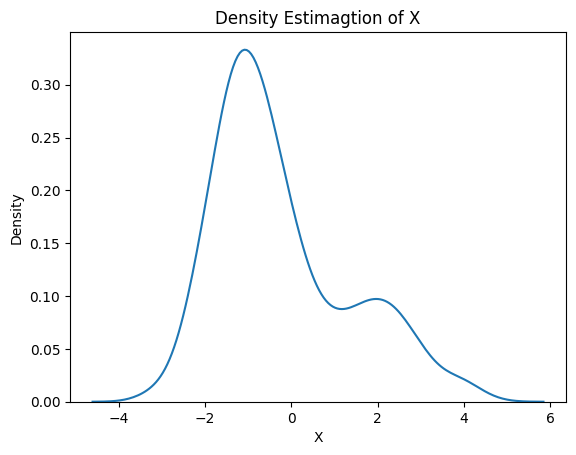

In [39]:
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size = 200)
X2 = np.random.normal(mu2, sigma2, size = 600)
X = np.concatenate([X1, X2])

sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimagtion of X')
plt.show()

In [37]:
mu1_hat, sigma1_hat = np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1) / len(X), len(X2) / len(X)

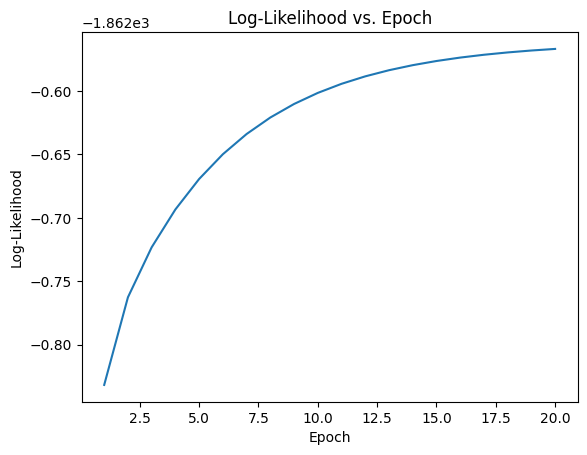

In [38]:
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
    gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
    gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
    # PDF ===> Probability Density Function  
    total = gamma1 + gamma2
    gamma1 /= total
    gamma2 /= total

    mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
    mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
    sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
    sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
    pi1_hat = np.mean(gamma1)
    pi2_hat = np.mean(gamma2)

    log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
                                   + pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
    log_likelihoods.append(log_likelihood)

plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()

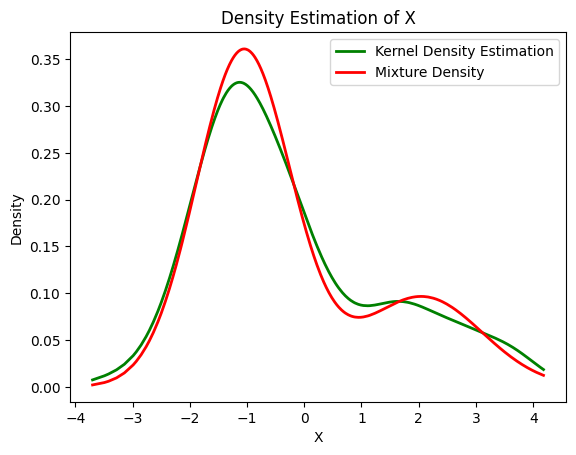

In [34]:
X_sorted = np.sort(X)
density_estimation = pi1_hat * norm.pdf(X_sorted, 
                                        mu1_hat, 
                                        sigma1_hat) + pi2_hat * norm.pdf(X_sorted,
                                                                         mu2_hat,
                                                                         sigma2_hat)
plt.plot(X_sorted, gaussian_kde(X_sorted)(X_sorted), color= 'green', linewidth = 2)
plt.plot(X_sorted, density_estimation, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation of X')
plt.legend(['Kernel Density Estimation','Mixture Density'])
plt.show()